# Data spaces thesis
## Andrea Settimo 262710
## Leonardo Tolomei 267638
___________________________________________________________________________________________________________________

## Import part

In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


___________________________________________________________________________________________________________________

## 1. Load the dataset

Link: http://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [2]:
dataset = pd.read_csv("./Dataset/forestfires.csv")
dataset.head()                                      # Shows the first five rows.


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


___________________________________________________________________________________________________________________

## 2. Data Analysis

**The dataset size is:**

In [3]:
dataset.shape


(517, 13)

**The dataset features are:**

In [4]:
featureNames = list(dataset)
print(featureNames)


['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


**The meaning of features:**
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun' 
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10 
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. RH - relative humidity in %: 15.0 to 100 
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 (this feature is the target)

**Statistics:**

In [5]:
dataset.describe()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


**Correletion Matrix:**

Pre-Processing the dataset: trasformazione della features month e day in numeri cosi da poter calcolare la matrice di correlazione

In [3]:
months = {
    'jan': 0,
    'feb': 1,
    'mar': 2,
    'apr': 3,
    'may': 4,
    'jun': 5,
    'jul': 6,
    'aug': 7,
    'sep': 8,
    'oct': 9,
    'nov': 10,
    'dec': 11,
}
days = {
    'mon': 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4,
    'sat': 5,
    'sun': 6
}

for i in range(len(dataset)):
    dataset.iloc[i, 2] = months[dataset.iloc[i, 2]]
    dataset.iloc[i, 3] = days[dataset.iloc[i, 3]]


In [7]:
dataset.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,2,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,9,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,9,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,2,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,2,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


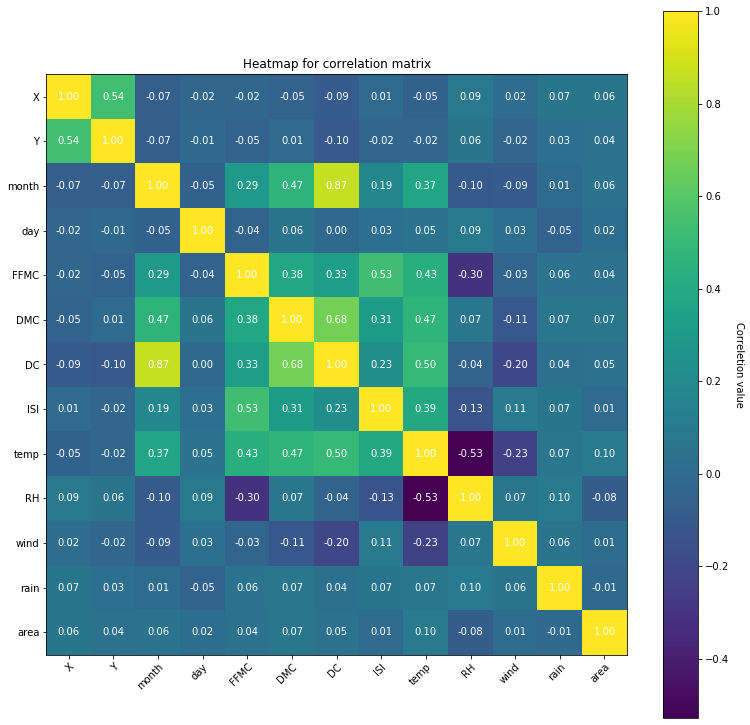

In [8]:
correlations = dataset.corr()
fig, ax = plt.subplots(figsize=(13,13))
im = ax.imshow(correlations)
ax.set_xticks(np.arange(len(featureNames)))
ax.set_yticks(np.arange(len(featureNames)))
# label them with the respective list entries
ax.set_xticklabels(featureNames)
ax.set_yticklabels(featureNames)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(featureNames)):
    for j in range(len(featureNames)):
        text = ax.text(j, i, "{0:.2f}".format(correlations.iloc[i, j]), ha="center", va="center", color="w")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correletion value", rotation=-90, va="bottom")

ax.set_title("Heatmap for correlation matrix")
plt.show()


The correletion matrix in detail:

In [9]:
correlations

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


**Box plot:**

___________________________________________________________________________________________

Removing the target attribute from the dataset structure.

In [4]:
dataset = dataset.values

X = dataset[:,0:12]
Y = dataset[:,12]

**Dataset partition**
The dataset partition is given by:
- Train: 70%;
- Test: 30%.

Another operation on the dataset is the standardization.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30, random_state=0)

print("The size of the training set is:", len(X_train))
print("The size of the test set is:", len(X_test))

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

The size of the training set is: 361
The size of the test set is: 156


____________________________________________________________________

## 3. PCA

In [7]:
def makePCA(X_train_, X_test_):
    pca = PCA(n_components=.95)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train_)
    X_test_pca = pca.transform(X_test_)
    return X_train_pca, X_test_pca

Apply the mapping between the old representetion and the new representation.

In [8]:
X_train_pca, X_test_pca = makePCA(X_train, X_test)

Aggiungere il grafico della varianza

## 4. Linear regression 

In [11]:
def makeLinearRegression(X_train_, Y_train_, X_test_, Y_test_):
    model = LinearRegression()
    model.fit(X_train_, Y_train_)
    Y_predict = model.predict(X_test_)
    print(np.sqrt(metrics.mean_squared_error(Y_test_, Y_predict)))  # RMSE

**With PCA:**

In [12]:
makeLinearRegression(X_train_pca, Y_train, X_test_pca, Y_test)

90.65231322891336


**Without PCA:**

In [13]:
makeLinearRegression(X_train, Y_train, X_test, Y_test)

90.67355071800473


The prediction of the model with PCA is better then the result of the model without PCA.

## Decision Tree Regression

In [14]:
def makeDecisionTree(X_train_, Y_train_, X_test_, Y_test_):
    decisionTree = GridSearchCV(estimator=DecisionTreeRegressor(),
                                param_grid={'max_depth': [1, 2, 3, 5, 10, 15, 20], 'criterion': ["mse", "friedman_mse", "mae"]},
                                cv=10, iid=False)
    decisionTree.fit(X_train_, Y_train_)
    Y_predict = decisionTree.predict(X_test_)
    print(np.sqrt(metrics.mean_squared_error(Y_test_, Y_predict)))  # RMSE
    print(decisionTree.best_params_)

**With PCA:**

In [15]:
makeDecisionTree(X_train_pca, Y_train, X_test_pca, Y_test)

92.48860110638167
{'criterion': 'mae', 'max_depth': 1}


**Without PCA:**

In [16]:
makeDecisionTree(X_train, Y_train, X_test, Y_test)

92.51348187960053
{'criterion': 'mae', 'max_depth': 1}


## Random forest

In [17]:
def makeRandomForest(X_train_, Y_train_, X_test_, Y_test_):
    randomForest = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100),
                                param_grid={'max_depth': [1, 2, 3, 5, 10, 15, 20], 'criterion': ["mse", "mae"]},
                                cv=10, iid=False)
    randomForest.fit(X_train_, Y_train_)
    Y_predict = randomForest.predict(X_test_)
    print(np.sqrt(metrics.mean_squared_error(Y_test_, Y_predict)))  # RMSE
    print(metrics.mean_absolute_error(Y_test_, Y_predict))
    Y_predict_train = randomForest.predict(X_train_)
    print(metrics.mean_absolute_error(Y_train_, Y_predict_train))
    print(randomForest.best_params_)

**With PCA:**

In [18]:
makeRandomForest(X_train_pca, Y_train, X_test_pca, Y_test)

92.4688717943914
18.5737358974359
10.404101939058172
{'criterion': 'mae', 'max_depth': 1}


**Without PCA:**

In [19]:
makeRandomForest(X_train, Y_train, X_test, Y_test)

92.44101781834114
18.239051282051285
10.233102354570637
{'criterion': 'mae', 'max_depth': 2}


## SVR

In [23]:
def makeSVR(X_train_, Y_train_, X_test_, Y_test_):
    svr = GridSearchCV(estimator=SVR(),
                                param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf'], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                                cv=10, iid=False, verbose=1, n_jobs=3)
    svr.fit(X_train_, Y_train_)
    Y_predict = svr.predict(X_test_)
    print(np.sqrt(metrics.mean_squared_error(Y_test_, Y_predict)))  # RMSE
    print(metrics.mean_absolute_error(Y_test_, Y_predict))
    Y_predict_train = svr.predict(X_train_)
    print(metrics.mean_absolute_error(Y_train_, Y_predict_train))
    print(svr.best_params_)

**With PCA:**

In [ ]:
makeSVR(X_train_pca, Y_train, X_test_pca, Y_test)

**Without PCA:**

In [ ]:
makeSVR(X_train, Y_train, X_test, Y_test)

## K-NN

In [20]:
def makeKNN(X_train_, Y_train_, X_test_, Y_test_):
    knn = GridSearchCV(estimator=KNeighborsRegressor(),
                                param_grid={'n_neighbors': [1, 3, 5, 7, 9, 13, 15, 17, 19], 'p': [1, 2]},
                                cv=10, iid=False, verbose=1, n_jobs=3)
    knn.fit(X_train_, Y_train_)
    Y_predict = knn.predict(X_test_)
    print(np.sqrt(metrics.mean_squared_error(Y_test_, Y_predict)))  # RMSE
    print(metrics.mean_absolute_error(Y_test_, Y_predict))
    Y_predict_train = knn.predict(X_train_)
    print(metrics.mean_absolute_error(Y_train_, Y_predict_train))
    print(knn.best_params_)

**With PCA:**

In [21]:
makeKNN(X_train_pca, Y_train, X_test_pca, Y_test)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


91.48841568137625
22.465441176470588
14.279664331106405
{'n_neighbors': 17, 'p': 2}


[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed:    1.4s finished


**Without PCA:**

In [22]:
makeKNN(X_train, Y_train, X_test, Y_test)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
91.50346680487222
22.14725113122172
14.027386345119766
{'n_neighbors': 17, 'p': 2}


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed:    0.2s finished
